# Your Name: Ashley Tsoi

# Your NetID: ast418

***

# Homework 3 - Part B

### <div style="color: red">Read Carefully Before Proceeding</div>

If you are having issues running this code because of missing libraries, check the material that we've done in class for installation instructions. This code uses what we have already seen, so if you've been able to execute the code of the Notebooks we've seen in class, you will be fine here as well.


You need to answer all questions. Make sure that you answer both **technical** (code-related) and **non-technical** (conceptual) parts of this homework. A lot of code is already available for you, and you can build on that. You are free to use code from our notebooks in class.  All visualizations must be generated by your code, programmatically.


Once you're done, download the notebook via `File` -> `Download as` -> `Notebook`, which will fetch a file with an ".ipynb" extension. Include this file in your submission, as a separate document -- **not** in the word / pdf submission itself. In case you use additional code stored in another directory, make sure to submit that as well.

***

### Part 4 - Mailing Campaign Revisited

This homework (mostly) expands on the problem that we've been working with in class: a mailing campaign. The main objective is for you to get a better grasp of a predictive model's performance.

In the `data` directory of this homework, you will find two files: `mail_train.tsv` and `mail_test.tsv`.

**For now**, use only the `mail_train.tsv` file.

For your convenience, both files have **already** been dummysized.

***

Like we usually do, start by loading the libraries of interest.

In [16]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance

import matplotlib.pyplot as plt
%matplotlib inline

**Read the files**

Let's start by reading our training data: the `mail_train.tsv` file.  Again, for now, you can / should omit the test data file entirely.

In [17]:
# Let's read the file
train_df = pd.read_csv("data/mail_train.tsv",  sep='\t')

# Let's print the top-5 rows
train_df.head()


,INCOME,WEALTH1,HIT,NUMPRM12,NGIFTALL,STATE_AA,STATE_AE,STATE_AK,STATE_AL,STATE_AP,...,GENDER_F,GENDER_J,GENDER_M,GENDER_U,MAJOR_,MAJOR_X,PEPSTRFL_,PEPSTRFL_X,GENDER_A,TARGET_B
0,7,9,1.0,14.0,37.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,0,1,0.0,0
1,1,4,0.0,7.0,6.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,1,0,0.0,0
2,3,3,5.0,22.0,11.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,0,1,0.0,0
3,4,4,0.0,10.0,18.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,0,1,0.0,1
4,7,9,1.0,14.0,12.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,0,1,0.0,1


In [18]:
features = train_df.drop(['TARGET_B'], axis=1)
labels = train_df['TARGET_B']

def get_best_acc(dframe, col_header):
    max_acc = 0
    for i in col_header:
        max_acc_in_col = max(dframe[i])
        if max_acc_in_col > max_acc:
            max_acc = max_acc_in_col
            best_param2 = i
    best_param1 = tree_df.loc[tree_df[best_param2] == max_acc].index[0]
    return best_param1, best_param2, max_acc

### P4.2 - Model Training and Complexity Control

Let's go back to our mailing campaign.  As part of your work here, you will need to pick 3 classifiers:

* Logistic Regression 
* Decision Trees
* A third classifier of your choice.  (k-NN, Naive Bayes, SVMs, etc)


For each of your models, you need to do complexity control, to make sure that it is not overfitting. As we have discussed in the class and seen during the lectures, we can use **cross validation** (on the _training dataset_) to achieve this goal. Therefore, for each model:

* You must pick a **complexity parameter** (e.g., $k$, $\lambda$, depth, etc)
* You need to select a **meaningful range of values** for the complexity parameter to test
* For each compexity parameter, evaluate your model's performance using **10-fold cross validation**.
* You must **collect and analyze** the results
* You must pick the **right complexity parameter value** following your analysis. You do _not_ have to create fitting graphs, unless you want to, but your work needs to make it clear **how** you came to the conclusion that this was the right parameter. That is, you need to support your reasoning with code and / or plots, or similar technique.

**Suggestion:** Do the above for **1** model first (e.g., Logistic Regression). Once you've done that, you can copy-paste your code for the other 2 models, making sure that you choose the proper evaluation parameter each time.

#### Model 1

In [19]:
# Logistic Regression

def cv_logreg(C_val):
    mail_logreg = LogisticRegression(C=int(C_val))
    return np.mean(cross_val_score(mail_logreg, features, labels, cv=10))


In [20]:
C = list(n for n in range(1,10))
#print(C)

In [21]:
logreg_score = []
for val in C:
    #print(cv_logreg(val))
    logreg_score.append(cv_logreg(val))
#print("========== Score List: ", logreg_score, " ==========")

/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

In [22]:
# Best param:
logreg_highest_acc = max(logreg_score)
best_C = C[logreg_score.index(max(logreg_score))]
print("== Best C value: ", best_C, " == ")
print("== Highest Accuracy: ", logreg_highest_acc, " == ")

== Best C value:  1  == 
== Highest Accuracy:  0.7969965555167261  == 


**Complexity Parameter Selection**

== Best C value:  1  == 
== Highest Accuracy:  0.7969965555167261  == 

***

#### Model 2

In [23]:
# Decision Trees

def cv_tree(depth, leaf):
    mail_tree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf, criterion="entropy")
    return cross_val_score(mail_tree, features, labels, cv=10)


In [24]:
max_tree_depth = 10
leaf_instance = [1,10,50,100,150]
tree_df = pd.DataFrame(index=range(1,int(max_tree_depth)), columns=leaf_instance)
for li in leaf_instance:  # This loop controls the different values on the x-axis
    tree_scores=[]
    for td in range(1,int(max_tree_depth)):
        tree_scores.append(np.mean(cv_tree(td,li)))
    tree_df[li] = tree_scores
#print(tree_df)

In [25]:
best_leaf_instance, best_depth, tree_highest_acc = get_best_acc(tree_df, leaf_instance)
print("== Best Leaf Instance: ", best_leaf_instance, " == ")
print("== Best Tree Depth: ", best_depth, " == ")
print("== Highest Accuracy: ", tree_highest_acc, " == ")

== Best Leaf Instance:  4  == 
== Best Tree Depth:  1  == 
== Highest Accuracy:  0.7980326108433632  == 


Text(0, 0.5, 'Accuracy')

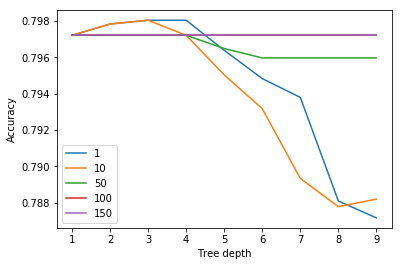

In [26]:
# Some plot because why not :D
ax = tree_df.plot()
ax.set_xlabel("Tree depth")
ax.set_ylabel("Accuracy")

*We can see that the graph confirms with the result above that leaf instance = 4 and tree depth = 1 yields the highest accuracy.

**Complexity Parameter Selection**

== Best Leaf Instance:  4  == 
== Best Tree Depth:  1  == 
== Highest Accuracy:  0.7980326108433632  == 

***

#### Model 3

In [27]:
# kNN

def cv_knn(k):
    mail_knn = KNeighborsClassifier(k, weights='distance')
    return np.mean(cross_val_score(mail_knn, features, labels, cv=10))


In [28]:
k = (range(50,150))

knn_score = []
for val in k:
    knn_score.append(cv_knn(val))
#print("========== Score List: ", knn_score, " ==========")

========== Score List:  [0.7969965555167261, 0.7969965555167261, 0.7969965555167261, 0.7969965555167261, 0.7969965555167261, 0.7969965555167261, 0.7969965555167261, 0.7971000751854632, 0.7969965555167261, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854632, 0.7971000751854

In [29]:
knn_highest_acc = max(knn_score)
best_k = k[knn_score.index(max(knn_score))]
print("== Best K value: ", best_k, " == ")
print("== Highest Accuracy: ", knn_highest_acc, " == ")

== Best K value:  57  == 
== Highest Accuracy:  0.7971000751854632  == 


**Complexity Parameter Selection**

== Best K value:  57  == 
== Highest Accuracy:  0.7971000751854632  == 

***

### P4.3 - Best Model: Winner takes all

Now that you have tuned the hyper-parameters of each model, you will compare them against each other. In particular, you will split the training dataset into 75% (sub)training and 25% for testing. With the **same** 75% of your (subtraining) data, you will train the 3 different models, with their best performing hyper-parameters - the ones you chose above.

You will then **test** the three models against the remaining **25%**. You will then **plot the ROC curve** for each model **on the same graph**. Make sure you have the proper legends in place and that they are visible.

The classifier (model) with the **best Area Under the ROC Curve (AUC)** on the 25% will be the winner.


When you split the data, you **must** specify the `random_state` parameter and set it to the numerical part of your NetID. 

**Remember:** For the ROC (and the AUC, subsequently), we want to have a _ranking_ of the predicted values. The ranking is obtained by predicting the _probability_ that an instance belongs to the class of interest (the "positive" class: user will donate). Our models can generate those probabilities right away; check our previous notebooks for which method to use.



<p/>
<div style="color: red"><b>Requirements:</b></div>


* **Split your training set** into 75% training, 25% testing. Use the `train_test_split` method. You **must** set the `random_state` to the numerical part of your NetID.
* **Train the 3 models** with the **best parameters** (selected earlier) on the 75% of the data. All models must be trained on the same subset.
* With each model, **compute the probability of the remaining 25%** to belong to the "positive" class. The "positive" class is that an individual will donate.
* Using those probabilities and the true outcomes, generate the necessary **information to plot the ROC curve**. ( `roc_curve()` )
* Using those probabilities and the true outcomes, also **compute the AUC**, for each of the 3 cases (`roc_auc_score()`).
* **Plot the three ROCs** together on the same graph for comparison.
* Pick the model that exhibits the **highest AUC** (based on the earlier computations).


In [32]:
#Print the best values just for fun
print("C = ", best_C)
print("Tree Depth = ", best_depth)
print("Leaf = ", best_leaf_instance)
print("k = ", best_k)

x_train, x_test, y_train, y_test = train_test_split(features, labels, train_size=0.75, random_state=418)
mail_best_logreg = LogisticRegression(C=best_C)
mail_best_logreg.fit(x_test, y_test)

mail_best_tree = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=best_leaf_instance, criterion="entropy")
mail_best_tree.fit(x_test, y_test)

mail_best_knn = KNeighborsClassifier(best_k, weights='distance')
mail_best_knn.fit(x_test, y_test)

C =  1
Tree Depth =  1
Leaf =  4
k =  57


/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/ashtsoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=57, p=2,
           weights='distance')

Decision Tree AUC = 0.555
Logistic Regression AUC = 0.649
kNN AUC = 1.000


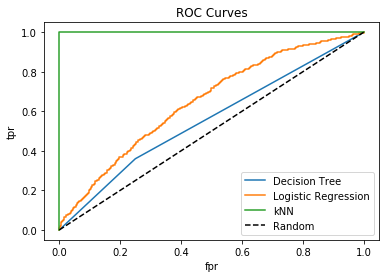

In [37]:
tprs = []
fprs = []
roc_labels = []

tree_test_prob = mail_best_tree.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true = y_test, y_score = tree_test_prob)
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("Decision Tree")
print ("Decision Tree AUC = %.3f" % metrics.roc_auc_score(y_true = y_test, y_score = tree_test_prob))

logreg_test_prob = mail_best_logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true = y_test, y_score = logreg_test_prob)
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("Logistic Regression")
print ("Logistic Regression AUC = %.3f" % metrics.roc_auc_score(y_true = y_test, y_score = logreg_test_prob))

knn_test_prob = mail_best_knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true = y_test, y_score = knn_test_prob)
tprs.append(tpr)
fprs.append(fpr)
roc_labels.append("kNN")
print ("kNN AUC = %.3f" % metrics.roc_auc_score(y_true = y_test, y_score = knn_test_prob))

for fpr, tpr, roc_label in zip(fprs, tprs, roc_labels):
    plt.plot(fpr, tpr, label=roc_label)

plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend()

plt.show()

### P4.4 - Which is the best performing model?

_Your answer here_
***

In [39]:
print ("Decision Tree AUC = %.3f" % metrics.roc_auc_score(y_true = y_test, y_score = tree_test_prob))
print ("Logistic Regression AUC = %.3f" % metrics.roc_auc_score(y_true = y_test, y_score = logreg_test_prob))
print ("kNN AUC = %.3f" % metrics.roc_auc_score(y_true = y_test, y_score = knn_test_prob))

Decision Tree AUC = 0.555
Logistic Regression AUC = 0.649
kNN AUC = 1.000


***

### P4.6 - Target Audience Size

Imagine that you have a budget of \\$600 and each invitation costs \\$1.5. What is the maximum number of individuals can we target?

**Note:** This question is **independent of** a classifier.

> $\frac{600}{1.5} = 400$
***

### P4.7 - Best-case Scenario

Assume for a moment that our classifiers can **perfectly** separate between the two classes. Also, each individual will donate (on average) \\$5.

* In this best-case scenario, how much do we expect to gather in donations?

* What will our profit be, after we account for the cost of sending the invites)?

Note that we are still bound by the budgetary constraint mentioned earlier.


**Note:** This question is **independent of** a classifier.

> We expect to gather $400*5 = \$2000$ of donations. However, the profit will be $\$2000 - \$600 = \$1400$ dollars.
***

### P4.8 - Generate a Profit Curve

Assume that each invitation costs **\$1.5**, and the average individual contribution (out of those who contribute) is **\$5**. Also, our budget is **\$600**.

To properly evaluate our approach for this type of problem, we need to use profit curves. Here, you'll generate a profit curve using your best performing classifier, which you picked earlier (based on the AUC measure).

With that, you will **train your classifier on the 75% split** of the training data and you will **generate a Profit Curve** by applying it on the remaining 25% of the (training) data. In case you use the `train_test_split` method again, you **must** specify the `random_state` parameter and set it to the numerical part of your NetID.

Recall that for a profit curve, you need to predict the probability of an instance to be in the "will donate" (positive) class. Check Module 5 for code to generate a Profit Curve.


In [41]:
# kNN is the best performing.

knn_test_prob = mail_best_knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true = y_test, y_score = knn_test_prob)

indiv_cont = 5
indiv_cost = -1.5
cost_matrix = pd.DataFrame([[indiv_cont+indiv_cost, indiv_cost], [0, 0]], 
                           columns=['(True) p', '(True) n'], 
                           index=['[Predicted] Y', '[Predicted] N'])

p_p = np.sum(y_test)/len(y_test)
p_n = 1 - p_p

Size_targeted_pop = float(len(y_test))

# To estimate our profit we use our TRUE POSITIVES and we want to convert these to 
actual_profit = cost_matrix['(True) p']['[Predicted] Y'] * tpr * p_p

# To estimate our profit we use our FALSE POSITIVES
actual_cost = cost_matrix['(True) n']['[Predicted] Y'] * fpr * p_n

expected_profits = actual_profit + actual_cost


# We will use the thresholds here to compute how many users are above it
n_targeted = []
for t in thresholds:
    above_threshold = tree_test_prob >= t
    above_thres_count = np.sum(above_threshold)
    n_targeted.append(above_thres_count)

# Turn these counts to percentages of users above the threshold
n_targeted = np.array(n_targeted) / len(y_test)

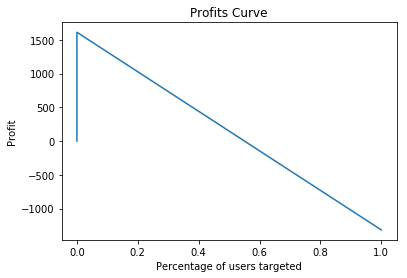

In [43]:
# Plot the profit curve
plt.plot(n_targeted, Size_targeted_pop*expected_profits)
plt.xlabel("Percentage of users targeted")
plt.ylabel("Profit")
plt.title("Profits Curve")
plt.show()

* the graph looks weird --> let me try with decision tree instead.

In [50]:
knn_test_prob = mail_best_tree.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true = y_test, y_score = knn_test_prob)

indiv_cont = 5
indiv_cost = -1.5
cost_matrix = pd.DataFrame([[indiv_cont+indiv_cost, indiv_cost], [0, 0]], 
                           columns=['(True) p', '(True) n'], 
                           index=['[Predicted] Y', '[Predicted] N'])

p_p = np.sum(y_test)/len(y_test)
p_n = 1 - p_p

Size_targeted_pop = float(len(y_test))

# To estimate our profit we use our TRUE POSITIVES and we want to convert these to 
actual_profit = cost_matrix['(True) p']['[Predicted] Y'] * tpr * p_p

# To estimate our profit we use our FALSE POSITIVES
actual_cost = cost_matrix['(True) n']['[Predicted] Y'] * fpr * p_n

expected_profits = actual_profit + actual_cost


# We will use the thresholds here to compute how many users are above it
n_targeted = []
for t in thresholds:
    above_threshold = tree_test_prob >= t
    above_thres_count = np.sum(above_threshold)
    n_targeted.append(above_thres_count)

# Turn these counts to percentages of users above the threshold
n_targeted = np.array(n_targeted) / len(y_test)

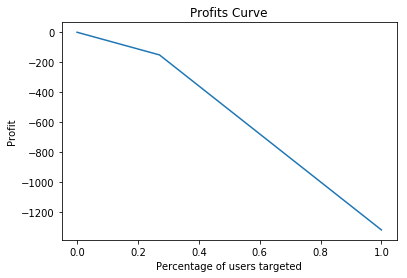

In [51]:
plt.plot(n_targeted, Size_targeted_pop*expected_profits)
plt.xlabel("Percentage of users targeted")
plt.ylabel("Profit")
plt.title("Profits Curve")
plt.show()

***

### P4.9 - Best Threshold

Using your earlier code and results, answer the following questions.
<div style="color: red">Your answers must be answered using code, not approximate estimations from the graph above.</div>

In [42]:
# Simple list
l = [ 2, 1, 5, 8, -1 ]
np.argmax( l )

3

The code above says that the maximum element is at index 3. If we then do `l[3]`, the result we will get will be 8 (the actual max value)!

Use the `np.argmax( expected_profits )` to find where the expected profits becomes maximum for your classifier. Using that index result, you can then "probe" any other arrays that you are using to store the thresholds or the number of people who are targeted (i.e., invited) and so on.

**Hint:** Let's say that you have stored the expected profits in a variable called `expected_profits`, as was done in the notebook of Module 5. To help you answer this question, you need to find the position in the `expected_profits` that the value gets maximum. You can easily find that position by doing: `np.argmax(expected_profits)`. 

**Attention:** That method does _not_ tell you what the maximum is. It does not say what the threshold is either.
It will only give you the _index_ in the `expected_profits` array that has the max value. See the code below for an example.

We are passing an entire list as an argument and we ask: what is the index in the list that has the maximum element ? Recall that _indexing_ in Python starts from 0, i.e., the 1st element is at index 0, the 2nd element is at index 1, and so on.

In [44]:
# Your code here
index = np.argmax(expected_profits)

**1.** For which threshold does your model hit its maximum?

In [56]:
# 1. For which threshold does your model hit its maximum?
threshold = thresholds[index]
threshold


0.25089803813208067

**2.** How many people should be invited (according to the model) to hit the maximum profit?

In [46]:
people_inv = n_targeted[index]*len(y_test)
people_inv


1613.4999999999998

**3.** Can you invite that many people? Why / Why not ?
> Yes I can invite this many people becasue the cost is below the budget and that the number of people is below the available space.

**4.** What will be your _actual_ profit, based on how many people you will finally invite? What is your _actual_ threshold?

In [55]:
max_profit = expected_profits[index]*Size_targeted_pop
print(max_profit)

t = sorted(tree_test_prob, reverse=True)
print(t[int(people_inv)-1])

-1354.9999999999998
0.16261733848702375


### P4.9 - Deployment time

It is time to send out invitations. To do so, you will rely on the results of your best performing classifier.

- Train your _best performing_ model on the entire training dataset. 

### <div style="color: red">DO NOT TRAIN THE MODEL ON THE TESTING DATA</div>

- Apply your model on the testing dataset and get the probability, for each test instance, to donate.

- You will invite the individuals based on the earlier results. You may only invite people who have a probability greater than the _threshold_ that you picked earlier. Remember that you also have a _cap_ on the number of people who can be invited.

In [48]:
# Let's read the test file
test_df = pd.read_csv("data/mail_test.tsv",  sep='\t')

# Let's print the top-5 rows
test_df.head()


,INCOME,WEALTH1,HIT,NUMPRM12,NGIFTALL,STATE_AA,STATE_AE,STATE_AK,STATE_AL,STATE_AP,...,GENDER_F,GENDER_J,GENDER_M,GENDER_U,MAJOR_,MAJOR_X,PEPSTRFL_,PEPSTRFL_X,GENDER_A,TARGET_B
0,6,6,6.0,12.0,2.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,1,0,0.0,0
1,2,3,4.0,12.0,14.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,1,0,0.0,1
2,5,5,0.0,13.0,12.0,0.0,0.0,0,0,0,...,0,0,1,0,1,0,0,1,0.0,0
3,4,9,0.0,7.0,6.0,0.0,0.0,0,1,0,...,1,0,0,0,1,0,1,0,0.0,0
4,2,1,0.0,14.0,2.0,0.0,0.0,0,0,0,...,1,0,0,0,1,0,1,0,0.0,0


In [57]:
mail_best_tree.fit(x_train, y_train)
tree_test_prob = mail_best_tree.predict_proba(features)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_true = labels, y_score = tree_test_prob)

indiv_cont = 5
indiv_cost = -1.5
cost_matrix = pd.DataFrame([[indiv_cont+indiv_cost, indiv_cost], [0, 0]], 
                           columns=['(True) p', '(True) n'], 
                           index=['[Predicted] Y', '[Predicted] N'])

p_p = np.sum(labels)/len(labels)
p_n = 1 - p_p

Size_targeted_pop = float(len(labels))

# To estimate our profit we use our TRUE POSITIVES and we want to convert these to 
actual_profit = cost_matrix['(True) p']['[Predicted] Y'] * tpr * p_p

# To estimate our profit we use our FALSE POSITIVES
actual_cost = cost_matrix['(True) n']['[Predicted] Y'] * fpr * p_n

expected_profits = actual_profit + actual_cost

above_threshold = tree_test_prob >= threshold
above_thres_count = np.sum(above_threshold)
n_targeted = above_thres_count / len(labels)

Following the above guidelines - and restrictions -, implement your solution so that you can answer the following questions;

1. How many people will you invite?

In [58]:
n_invite = n_targeted*len(Y_test)
print(n_invite, " people will be invited.")

1611.4924909373383  people will be invited.


2. How much profit will you make? 

profit = float(len(y_train))*expected_profits[int(n_targeted)]
print("The estimated profit is: ", profit)

3. Given your budget and your profit, does / did it make sense to target those individuals?
> The model is not suggesting to invite everyone -- so we don't have to worry about the constraints. This is because in this mailing campaign problem, the total number of positive instances is usually small compared to the number of negative instances, so a high accuracy may lead to a 
result like this. Since the goal is to invite people and obtain a highest profit even if some cost of inviting the wrong ones may be incurred, other measures like precision may be used help choose a better model.


***